### Cleaning the dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime 

In [2]:
data = pd.read_csv('bank_transactions.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


In [4]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/94,F,JAMSHEDPUR,17819.05,2/8/16,143207,25.0
1,T2,C2142763,4/4/57,M,JHAJJAR,2270.69,2/8/16,141858,27999.0
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/16,142712,459.0
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/16,142714,2060.0
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/16,181156,1762.5


### Missing values

In [5]:
data.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

remove missing data

In [6]:
data.dropna(inplace=True)

### Convert date to datetime

In [7]:
data.CustomerDOB = pd.to_datetime(data.CustomerDOB)
data.TransactionDate = pd.to_datetime(data.TransactionDate)

In [8]:
def zeros(x):
    l = len(x)
    if l != 6:
        x = '0' * (6-l) + x
    return x

In [9]:
data.TransactionTime = list(map(str,data.TransactionTime))
data.TransactionTime = list(map(zeros,data.TransactionTime))
data.TransactionTime = data.TransactionTime.apply(lambda x: f'{x[:2]}:{x[2:4]}:{x[4:]}')
data.TransactionTime = pd.to_datetime(data.TransactionTime, format='%H:%M:%S')

<AxesSubplot:>

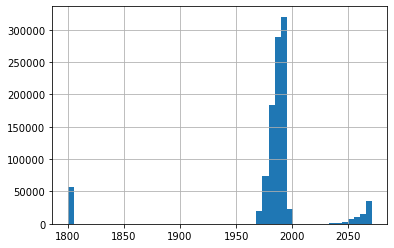

In [10]:
data.CustomerDOB.dt.year.hist(bins=50)

Replace in the right century the dates after 2000 and remove the ones in 1800

In [12]:
data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] = data.loc[data.CustomerDOB.dt.year > 2000, 'CustomerDOB'] - pd.DateOffset(years = 100)
data.drop(data[data.CustomerDOB.dt.year == 1800].index, axis=0, inplace=True)

<AxesSubplot:>

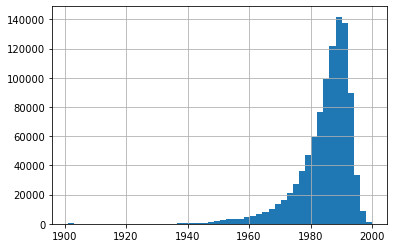

In [13]:
data.CustomerDOB.dt.year.hist(bins=50)

### Customer age
Customer ids are not unique

In [14]:
data[data.CustomerID == 'C3226689']

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
19882,T19883,C3226689,1990-01-01,M,BASTI,11369.40,2016-09-26,1900-01-01 13:13:42,200.00
35613,T35614,C3226689,1987-09-15,M,NOIDA,96820.46,2016-09-30,1900-01-01 14:50:16,418.00
218661,T218662,C3226689,1984-04-11,F,NEW DELHI,1667.83,2016-08-08,1900-01-01 19:02:33,4700.00
756541,T756542,C3226689,1972-09-17,M,SHARJAH,588826.94,2016-01-09,1900-01-01 16:55:54,6351.39
836123,T836124,C3226689,1977-07-20,M,THANE,369.36,2016-04-09,1900-01-01 13:46:45,1749.00
984048,T984049,C3226689,1985-05-21,M,GURGAON,12977.22,2016-09-15,1900-01-01 19:59:29,1340.00


Calculating customers age

In [15]:
data['CustomerAge'] = (( pd.to_datetime('today') - data.CustomerDOB ) / np.timedelta64(1, 'Y')).round(0)
data['CustomerAge'] = data['CustomerAge'].astype(int)

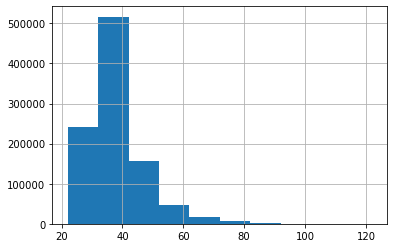

In [16]:
data.CustomerAge.hist();

### Customer transaction

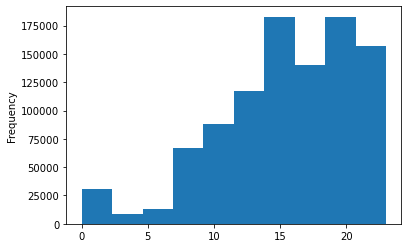

In [17]:
data.TransactionTime.dt.hour.plot.hist();

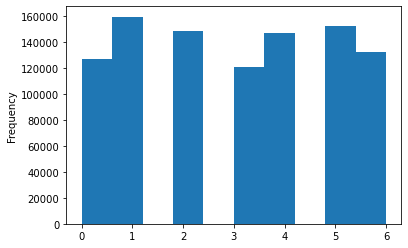

In [18]:
data.TransactionDate.dt.dayofweek.plot.hist();

In [19]:
data['TransactionAmount (INR)'] = data['TransactionAmount (INR)'].astype(int)
data['Utilisation'] = data['CustAccountBalance'] - data['TransactionAmount (INR)']

### Save file as pickle

In [20]:
data.to_pickle('bank.pkl')

# _2. Grouping customers together!_

### 2.1 Getting your data + feature engineering


Sometimes, the features (variables, fields) are not given in a dataset but can be created from it. The previous step is known as feature engineering. For example, the original dataset has several transactions done by the same customer. Then, we ask you to group data by the client (using CustomerId) and, based on it, create the following new features for each CustomerId:

A volte, le funzionalità (variabili, campi) non sono fornite in un set di dati ma possono essere create da esso. Il passaggio precedente è noto come ingegneria delle funzionalità. Ad esempio, il set di dati originale ha diverse transazioni eseguite dallo stesso cliente. Quindi, ti chiediamo di raggruppare i dati per cliente (utilizzando CustomerId) e, in base ad esso, creare le seguenti nuove funzionalità per ogni CustomerId:

a) Number of transactions

b) Number of transactions with a balance bigger than 100 USD

c) Average amount of the transactions

d) Average balance

e) Average difference between the balance and the transaction amount for each customer (this is mainly known in the banking world as utilisation).

f) Gender of the customer

h) Most frequent location of the customer

- Invece di utilizzare solo la media, puoi utilizzare altre funzioni come minimo, massimo, percentili, ecc.
- Pensa ad aggiungere filtri alle tue funzioni. Ad esempio, in "Numero di transazioni con saldo superiore a 100 USD",
  il filtro era "più grande di 100 USD". Riesci a pensare ad altri filtri, includendo anche altre variabili?
- Pensa di includere nei tuoi calcoli le informazioni fornite dai campi data e ora della transazione.
- Pensa a ottenere informazioni dal compleanno di un cliente, anche confrontandolo con altri campi.
- Puoi anche calcolare le percentuali nelle tue funzionalità. Pensa a un insieme plausibile di percentuali che vale la pena calcolare.

In [20]:
clear = pd.read_pickle('clear_dataset.pkl')

In [21]:
clear['CustomerAge'] = (( pd.to_datetime('today') - data.CustomerDOB ) / np.timedelta64(1, 'Y')).round(0)
clear['CustomerAge'] = clear['CustomerAge'].astype(int)

In [22]:
clear['TransactionAmount (INR)'] = clear['TransactionAmount (INR)'].astype(int)
clear['Utilisation'] = clear['CustAccountBalance'] - clear['TransactionAmount (INR)']

In [23]:
clear.to_pickle('final_dataset_.pkl')

In [26]:
data = pd.read_pickle('final_dataset_.pkl')

In [162]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,...,Gender of the customer,Most frequent location of the customer,Minimum age customers,Maximum age customers,Num_trans_balance_smaller_than_100,1st quantile Balance,Balance Median,3rd quantile Balance,STD transaction amount,most common month2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25,28,...,F,JAMSHEDPUR,28,28,0,17819.0500,17819.050,17819.0500,NaN,02
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999,66,...,M,JHAJJAR,66,66,0,2270.6900,2270.690,2270.6900,NaN,02
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459,26,...,F,MUMBAI,26,26,0,17874.4400,17874.440,17874.4400,NaN,02
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060,49,...,F,MUMBAI,43,49,0,219022.6375,434849.495,650676.3525,835.800215,08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762,35,...,F,NAVI MUMBAI,35,35,0,6714.4300,6714.430,6714.4300,NaN,02


In [163]:
#Number of transactions
data['Number_of_transaction'] = data.groupby(['CustomerID'])['TransactionID'].transform('count')

In [164]:
#Number of transactions with a balance bigger than 100
data['Num_trans_balance_bigger_than_100'] = data[data['CustAccountBalance'].gt(100)].groupby('CustomerID')['CustAccountBalance'].transform('count')
data['Num_trans_balance_bigger_than_100'] = data['Num_trans_balance_bigger_than_100'].fillna(0).astype(int)

In [31]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,Utilisation,Number_of_transaction,Num_trans_balance_bigger_than_100
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25,28,17794.05,1,1
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999,66,-25728.31,1,1
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459,26,17415.44,1,1
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060,49,864443.21,2,2
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762,35,4952.43,1,1


In [165]:
#Average amount of the transactions
#TransactionAmount (INR)
data['Average amount of the transactions'] = data.groupby('CustomerID')['TransactionAmount (INR)'].transform('mean')
data['Average amount of the transactions'] = round(data['Average amount of the transactions'], 3)


In [166]:
#Average balance
#CustAccountBalance
data['Average Balance'] = data.groupby('CustomerID')['CustAccountBalance'].transform('mean')
data['Average Balance'] = round(data['Average Balance'], 3)



In [36]:
#Gender of the customer
#data['Gender of the customer'] = data.groupby('CustomerID')['CustGender'].transform('sum')
data['Gender of the customer'] = data.groupby('CustomerID')['CustGender'].transform(lambda x: x.value_counts().idxmax())

In [44]:
#Most frequent location of the customer
data['Most frequent location of the customer'] = data.groupby('CustomerID')['CustLocation'].transform(lambda x: x.value_counts().idxmax())

Consider at least 20 additional features that can be generated for each CustomerId. Describe each of them and why you believe they will be helpful. Moreover, add it to the previous dataset (the one with seven features). In the end, you should have for each CustomerID at least 27 features (7 recommended + 20 suggested by you).

In [ ]:
#eta minima dei customer 
#eta massima dei customer 
#media di eta??
#balance smaller than 100 USD
#common time delle transazioni ?? 
#percentili 
#mese in cui hanno piu transazioni

In [161]:
data.head(15)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,...,Gender of the customer,Most frequent location of the customer,Minimum age customers,Maximum age customers,Num_trans_balance_smaller_than_100,1st quantile Balance,Balance Median,3rd quantile Balance,STD transaction amount,most common month2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25,28,...,F,JAMSHEDPUR,28,28,0,17819.0500,17819.050,17819.0500,NaN,02
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999,66,...,M,JHAJJAR,66,66,0,2270.6900,2270.690,2270.6900,NaN,02
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459,26,...,F,MUMBAI,26,26,0,17874.4400,17874.440,17874.4400,NaN,02
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060,49,...,F,MUMBAI,43,49,0,219022.6375,434849.495,650676.3525,835.800215,08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762,35,...,F,NAVI MUMBAI,35,35,0,6714.4300,6714.430,6714.4300,NaN,02
5,T6,C1536588,1972-08-10,F,ITANAGAR,53609.20,2016-02-08,17:39:40,676,50,...,F,ITANAGAR,50,50,0,53609.2000,53609.200,53609.2000,NaN,02
6,T7,C7126560,1992-01-26,F,MUMBAI,973.46,2016-02-08,17:38:06,566,31,...,M,MUMBAI,30,36,0,1782.6275,7304.080,18124.3175,253.970307,10
7,T8,C1220223,1982-01-27,M,MUMBAI,95075.54,2016-02-08,17:05:37,148,41,...,M,MUMBAI,41,41,0,95075.5400,95075.540,95075.5400,NaN,02
8,T9,C8536061,1988-04-19,F,GURGAON,14906.96,2016-02-08,19:28:25,833,35,...,F,GURGAON,35,35,0,14906.9600,14906.960,14906.9600,NaN,02
9,T10,C6638934,1984-06-22,M,MUMBAI,4279.22,2016-02-08,19:24:46,289,38,...,M,MUMBAI,38,38,0,4279.2200,4279.220,4279.2200,NaN,02


In [50]:
data.to_pickle('dataset2_1.pkl')

In [60]:
#Minimum age customers
data['Minimum age customers'] = data.groupby('CustomerID')['CustomerAge'].transform(lambda x: x.min())

In [62]:
# Maximum age customers
data['Maximum age customers'] = data.groupby('CustomerID')['CustomerAge'].transform(lambda x: x.max())

In [57]:
# Num_trans_balance_smaller_than_100
data['Num_trans_balance_smaller_than_100'] = data[data['CustAccountBalance'].lt(100)].groupby('CustomerID')['CustAccountBalance'].transform('count')
data['Num_trans_balance_smaller_than_100'] = data['Num_trans_balance_smaller_than_100'].fillna(0).astype(int)

In [64]:
#1st quantile
data['1st quantile Balance'] = data.groupby('CustomerID')['CustAccountBalance'].transform(lambda x: x.quantile(0.25))

In [72]:
#median
data['Balance Median'] = data.groupby('CustomerID')['CustAccountBalance'].transform(lambda x: x.median())

In [75]:
#3rd quantile balance
data['3rd quantile Balance'] = data.groupby('CustomerID')['CustAccountBalance'].transform(lambda x: x.quantile(0.75))

In [77]:
#deviazione standard di TransactionAmount (INR)
data['STD transaction amount'] = data.groupby('CustomerID')['TransactionAmount (INR)'].transform(lambda x: x.std())


In [140]:
#most common month of transaction
data['most common month2 '] = data.groupby('CustomerID')['TransactionDate'].transform(lambda x: x.dt.strftime('%m').max())


In [173]:
#data[data.CustomerID == 'C3226689']

In [174]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,...,Gender of the customer,Most frequent location of the customer,Minimum age customers,Maximum age customers,Num_trans_balance_smaller_than_100,1st quantile Balance,Balance Median,3rd quantile Balance,STD transaction amount,most common month2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25,28,...,F,JAMSHEDPUR,28,28,0,17819.0500,17819.050,17819.0500,NaN,02
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999,66,...,M,JHAJJAR,66,66,0,2270.6900,2270.690,2270.6900,NaN,02
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459,26,...,F,MUMBAI,26,26,0,17874.4400,17874.440,17874.4400,NaN,02
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060,49,...,F,MUMBAI,43,49,0,219022.6375,434849.495,650676.3525,835.800215,08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762,35,...,F,NAVI MUMBAI,35,35,0,6714.4300,6714.430,6714.4300,NaN,02


In [183]:
print(type(data['TransactionTime']))
print(type(data['TransactionDate']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [192]:
#most common hour of transaction
#data['Most common hour of transaction '] = data.groupby('CustomerID')['TransactionTime'].transform(lambda x: x.hour.max())

In [206]:
data[ "STD transaction amount" ].fillna ( "No STD" , inplace = True )

In [207]:
data.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,...,Gender of the customer,Most frequent location of the customer,Minimum age customers,Maximum age customers,Num_trans_balance_smaller_than_100,1st quantile Balance,Balance Median,3rd quantile Balance,STD transaction amount,most common month2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25,28,...,F,JAMSHEDPUR,28,28,0,17819.0500,17819.050,17819.0500,No STD,02
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999,66,...,M,JHAJJAR,66,66,0,2270.6900,2270.690,2270.6900,No STD,02
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459,26,...,F,MUMBAI,26,26,0,17874.4400,17874.440,17874.4400,No STD,02
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060,49,...,F,MUMBAI,43,49,0,219022.6375,434849.495,650676.3525,835.800215,08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762,35,...,F,NAVI MUMBAI,35,35,0,6714.4300,6714.430,6714.4300,No STD,02


In [208]:
data.to_pickle('2_1aggiornato.pkl')

In [209]:
data2 = pd.read_pickle('2_1aggiornato.pkl')

In [210]:
data2.head()

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,...,Gender of the customer,Most frequent location of the customer,Minimum age customers,Maximum age customers,Num_trans_balance_smaller_than_100,1st quantile Balance,Balance Median,3rd quantile Balance,STD transaction amount,most common month2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25,28,...,F,JAMSHEDPUR,28,28,0,17819.0500,17819.050,17819.0500,No STD,02
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999,66,...,M,JHAJJAR,66,66,0,2270.6900,2270.690,2270.6900,No STD,02
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459,26,...,F,MUMBAI,26,26,0,17874.4400,17874.440,17874.4400,No STD,02
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060,49,...,F,MUMBAI,43,49,0,219022.6375,434849.495,650676.3525,835.800215,08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762,35,...,F,NAVI MUMBAI,35,35,0,6714.4300,6714.430,6714.4300,No STD,02


## 2.2 Choose your features (variables)!

To normalise or not to normalise? That's the question. Sometimes it is worth normalising (scaling) the features. Explain if it is a good idea to perform any normalisation method. If you think the normalisation should be used, apply it to your data (look at the available normalisation functions in the scikit-learn library)

In [65]:
import numpy as np
from sklearn.preprocessing import normalize
from sklearn import preprocessing
scaler = StandardScaler()
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [189]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen 
%config InlineBackend.figure_format = 'retina'

In [182]:
data2 = pd.read_pickle('2_1aggiornato.pkl')

#### To normalise or not to normalise? That's the question

The goal of normalization is to change the values ​​of numeric columns in the dataset to use a common scale, without distortion in the ranges of values ​​or loss of information.

We chose to normalize the columns _CustAccountBalance_ and  _TransactionAmount (INR)_ even though we didn't need to at this stage.

#### - Normalize CustAccountBalance

Text(0, 0.5, 'Balance')

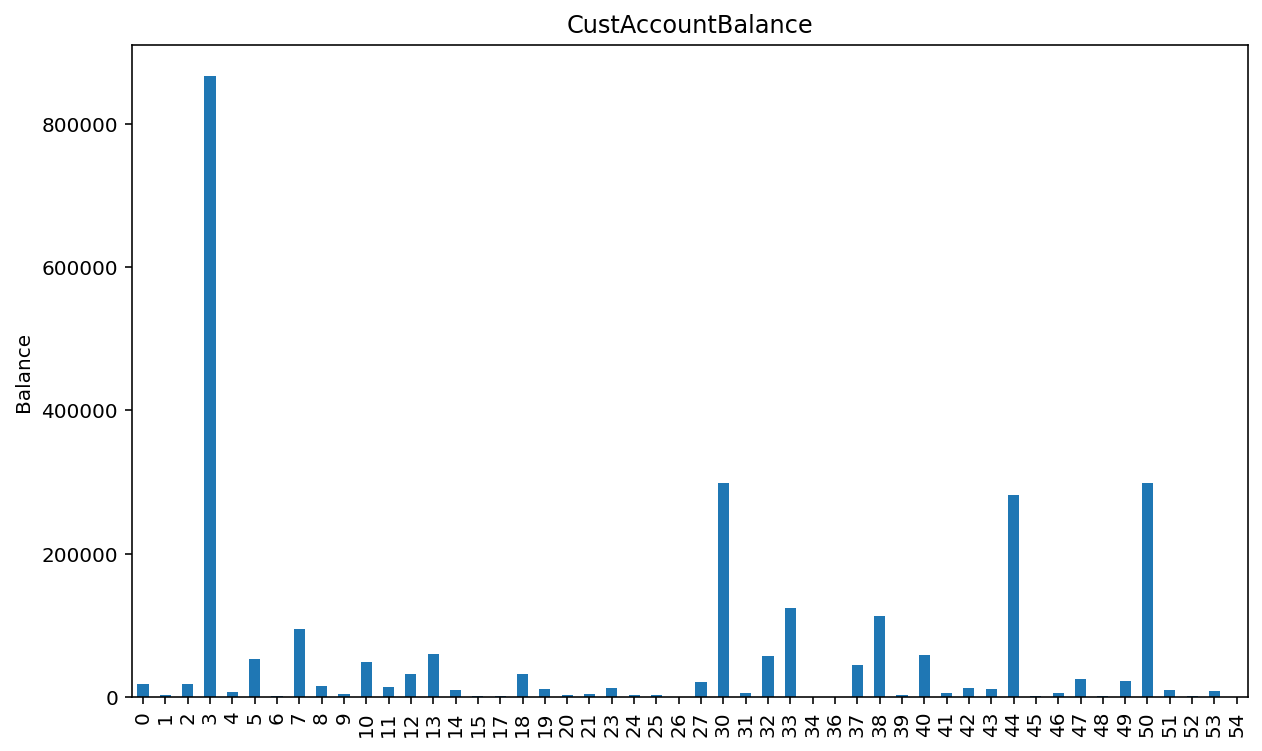

In [190]:
data2['CustAccountBalance'].iloc[:50].plot(kind = 'bar')
plt.title("CustAccountBalance")
plt.xlabel("")
plt.ylabel("Balance")


In [184]:
df_sklearn2 = data2.copy()

In [185]:
df_sklearn2

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,...,Gender of the customer,Most frequent location of the customer,Minimum age customers,Maximum age customers,Num_trans_balance_smaller_than_100,1st quantile Balance,Balance Median,3rd quantile Balance,STD transaction amount,most common month2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,14:32:07,25,28,...,F,JAMSHEDPUR,28,28,0,17819.0500,17819.050,17819.0500,No STD,02
1,T2,C2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,14:18:58,27999,66,...,M,JHAJJAR,66,66,0,2270.6900,2270.690,2270.6900,No STD,02
2,T3,C4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,14:27:12,459,26,...,F,MUMBAI,26,26,0,17874.4400,17874.440,17874.4400,No STD,02
3,T4,C5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,14:27:14,2060,49,...,F,MUMBAI,43,49,0,219022.6375,434849.495,650676.3525,835.800215,08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,18:11:56,1762,35,...,F,NAVI MUMBAI,35,35,0,6714.4300,6714.430,6714.4300,No STD,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,18:48:24,799,32,...,M,NEW DELHI,32,32,0,7635.1900,7635.190,7635.1900,No STD,09
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,18:37:34,460,31,...,M,NASHIK,31,31,0,27311.4200,27311.420,27311.4200,No STD,09
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,18:33:13,770,34,...,M,JAGADHRI,34,53,0,58200.4650,112719.330,167238.1950,397.394011,09
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,18:47:06,1000,44,...,M,VISAKHAPATNAM,44,44,0,10117.8700,10117.870,10117.8700,No STD,09


In [186]:
# apply normalization techniques
column = 'CustAccountBalance'
df_sklearn2[column] = MinMaxScaler().fit_transform(np.array(df_sklearn2[column]).reshape(-1,1))

In [187]:
display(df_sklearn2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,...,Gender of the customer,Most frequent location of the customer,Minimum age customers,Maximum age customers,Num_trans_balance_smaller_than_100,1st quantile Balance,Balance Median,3rd quantile Balance,STD transaction amount,most common month2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,0.000155,2016-02-08,14:32:07,25,28,...,F,JAMSHEDPUR,28,28,0,17819.0500,17819.050,17819.0500,No STD,02
1,T2,C2142763,1957-04-04,M,JHAJJAR,0.000020,2016-02-08,14:18:58,27999,66,...,M,JHAJJAR,66,66,0,2270.6900,2270.690,2270.6900,No STD,02
2,T3,C4417068,1996-11-26,F,MUMBAI,0.000155,2016-02-08,14:27:12,459,26,...,F,MUMBAI,26,26,0,17874.4400,17874.440,17874.4400,No STD,02
3,T4,C5342380,1973-09-14,F,MUMBAI,0.007532,2016-02-08,14:27:14,2060,49,...,F,MUMBAI,43,49,0,219022.6375,434849.495,650676.3525,835.800215,08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,0.000058,2016-02-08,18:11:56,1762,35,...,F,NAVI MUMBAI,35,35,0,6714.4300,6714.430,6714.4300,No STD,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,0.000066,2016-09-18,18:48:24,799,32,...,M,NEW DELHI,32,32,0,7635.1900,7635.190,7635.1900,No STD,09
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,0.000237,2016-09-18,18:37:34,460,31,...,M,NASHIK,31,31,0,27311.4200,27311.420,27311.4200,No STD,09
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,0.001928,2016-09-18,18:33:13,770,34,...,M,JAGADHRI,34,53,0,58200.4650,112719.330,167238.1950,397.394011,09
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,0.000088,2016-09-18,18:47:06,1000,44,...,M,VISAKHAPATNAM,44,44,0,10117.8700,10117.870,10117.8700,No STD,09


#### Let’s check with this plot:

<AxesSubplot:>

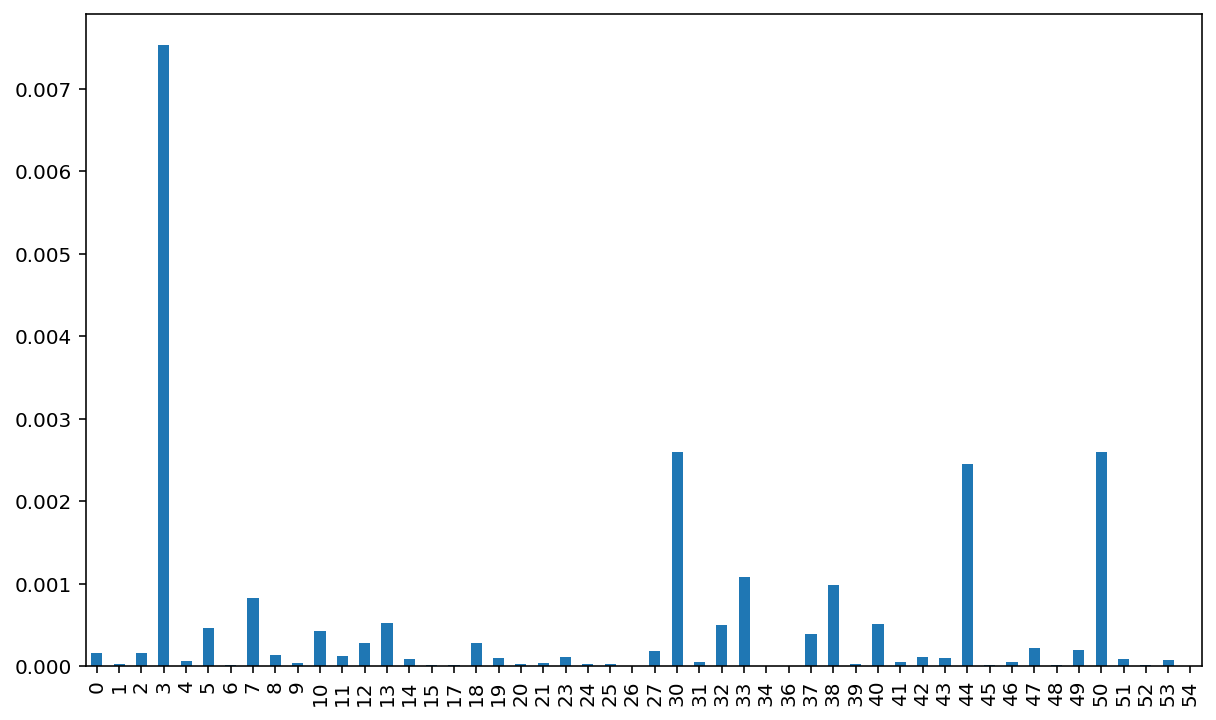

In [191]:
df_sklearn2['CustAccountBalance'].iloc[:50].plot(kind = 'bar')

#### - Normalize  'TransactionAmount (INR)'

Text(0, 0.5, 'Amount')

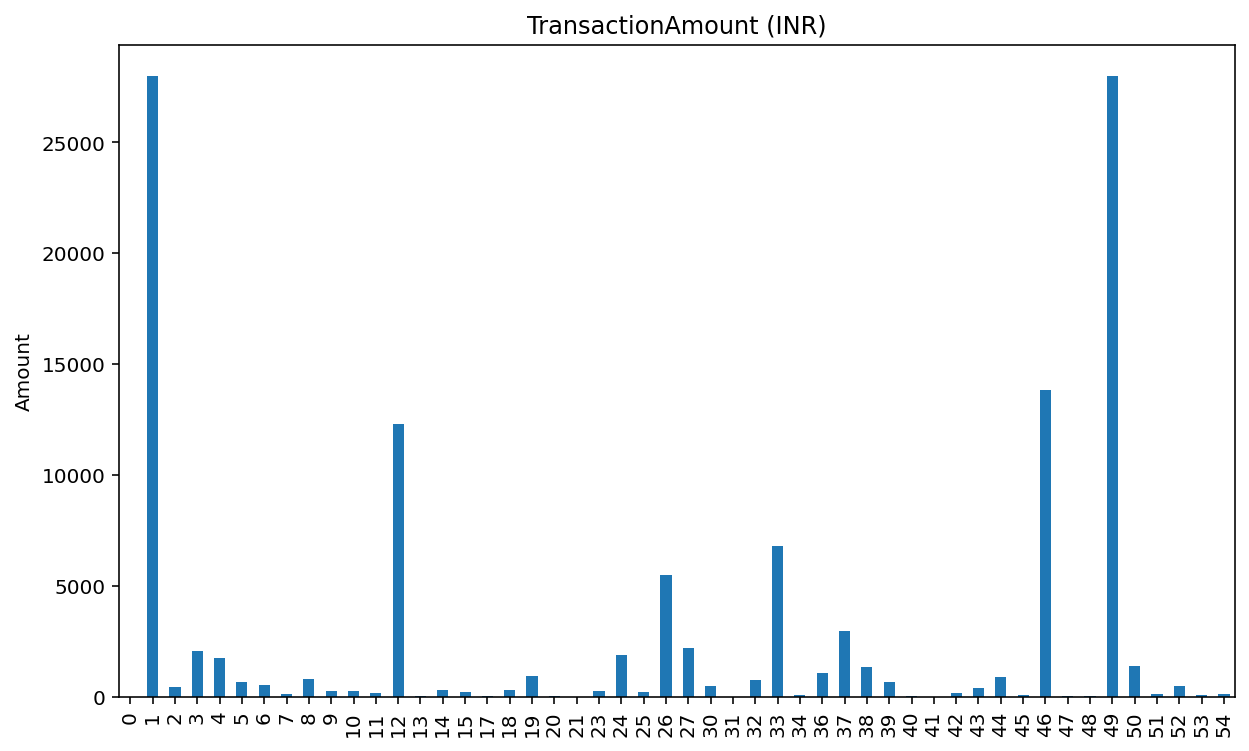

In [49]:
data2['TransactionAmount (INR)'].iloc[:50].plot(kind = 'bar')
plt.title("TransactionAmount (INR)")
plt.xlabel("")
plt.ylabel("Amount")

In [192]:
# apply normalization techniques
column = 'TransactionAmount (INR)'
df_sklearn2[column] = MinMaxScaler().fit_transform(np.array(df_sklearn2[column]).reshape(-1,1))

In [193]:
display(df_sklearn2)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),CustomerAge,...,Gender of the customer,Most frequent location of the customer,Minimum age customers,Maximum age customers,Num_trans_balance_smaller_than_100,1st quantile Balance,Balance Median,3rd quantile Balance,STD transaction amount,most common month2
0,T1,C5841053,1994-10-01,F,JAMSHEDPUR,0.000155,2016-02-08,14:32:07,0.000016,28,...,F,JAMSHEDPUR,28,28,0,17819.0500,17819.050,17819.0500,No STD,02
1,T2,C2142763,1957-04-04,M,JHAJJAR,0.000020,2016-02-08,14:18:58,0.017948,66,...,M,JHAJJAR,66,66,0,2270.6900,2270.690,2270.6900,No STD,02
2,T3,C4417068,1996-11-26,F,MUMBAI,0.000155,2016-02-08,14:27:12,0.000294,26,...,F,MUMBAI,26,26,0,17874.4400,17874.440,17874.4400,No STD,02
3,T4,C5342380,1973-09-14,F,MUMBAI,0.007532,2016-02-08,14:27:14,0.001320,49,...,F,MUMBAI,43,49,0,219022.6375,434849.495,650676.3525,835.800215,08
4,T5,C9031234,1988-03-24,F,NAVI MUMBAI,0.000058,2016-02-08,18:11:56,0.001129,35,...,F,NAVI MUMBAI,35,35,0,6714.4300,6714.430,6714.4300,No STD,02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,T1048563,C8020229,1990-08-04,M,NEW DELHI,0.000066,2016-09-18,18:48:24,0.000512,32,...,M,NEW DELHI,32,32,0,7635.1900,7635.190,7635.1900,No STD,09
1048563,T1048564,C6459278,1992-02-20,M,NASHIK,0.000237,2016-09-18,18:37:34,0.000295,31,...,M,NASHIK,31,31,0,27311.4200,27311.420,27311.4200,No STD,09
1048564,T1048565,C6412354,1989-05-18,M,HYDERABAD,0.001928,2016-09-18,18:33:13,0.000494,34,...,M,JAGADHRI,34,53,0,58200.4650,112719.330,167238.1950,397.394011,09
1048565,T1048566,C6420483,1978-08-30,M,VISAKHAPATNAM,0.000088,2016-09-18,18:47:06,0.000641,44,...,M,VISAKHAPATNAM,44,44,0,10117.8700,10117.870,10117.8700,No STD,09


<AxesSubplot:>

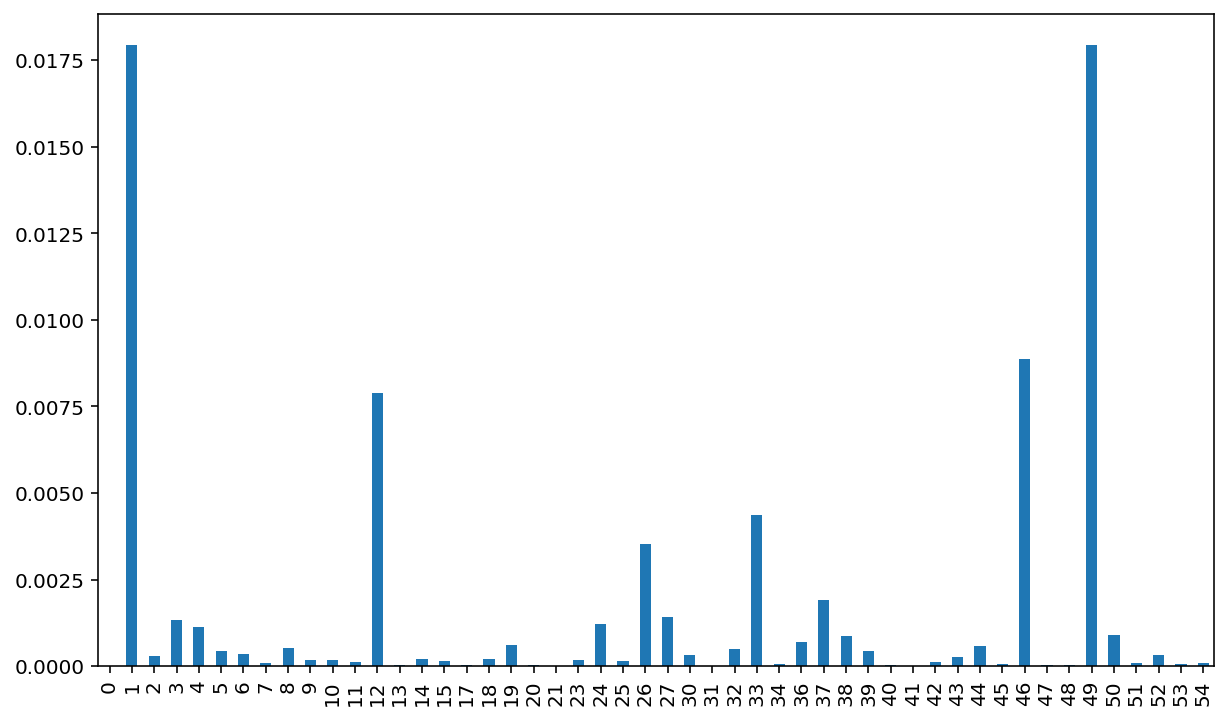

In [194]:
df_sklearn2['TransactionAmount (INR)'].iloc[:50].plot(kind = 'bar')

Select one method for dimensionality reduction and apply it to your data. Some suggestions are Principal Component Analysis, Multiple Correspondence Analysis, Singular Value Decomposition, Factor Analysis for Mixed Data, Two-Steps clustering. Make sure that the method you choose applies to the features you have or modify your data to be able to use it. Explain why you chose that method and the limitations it may have.

## PCA using Python (scikit-learn)
This technique aims to reduce the more or less high number of variables that describe a set of data to a smaller number of latent variables, limiting the loss of information as much as possible. 

Principal component analysis (PCA) is aimed at deriving, starting from a set of correlated numerical variables, a smaller set of "artificial" orthogonal variables. The reduced set of linear orthogonal projections (known as "principal components", "PC") is obtained by linearly combining the original variables in an appropriate manner.

- The central point of PCA is the spectral decomposition (also called eigenvalue and eigenvector decomposition, or eigendecomposition) of the sample variance/covariance matrix. This decomposition returns the eigenvalues ​​and eigenvalues ​​of the covariance matrix. The eigenvalues ​​(in decreasing order of value) represent the amount of total variability observed on the original variables, "explained" by each principal component; the eigenvectors instead represent the corresponding (orthogonal) directions of maximum variability extracted from the principal components.



#### Standardize the Data

Since PCA yields a feature subspace that maximizes the variance along the axes, it makes sense to standardize the data, especially, if it was measured on different scales.  trasform the data into unit scale (mean=0 and variance=1), which is a requirement for the optimal performance of many machine learning algorithms.

The principal components are extracted from the correlation matrix of the variables, which is equivalent to calculating the principal components from the original variables after each of them has been standardized to have unitary variance

In [143]:
features = ['CustAccountBalance','CustomerAge', 'TransactionAmount (INR)', '1st quantile Balance', 'Utilisation','Average Balance','Balance Median','3rd quantile Balance' ]
x = data2.loc[:, features].values

In [144]:
x = StandardScaler().fit_transform(x)

In [145]:
pd.DataFrame(data = x, columns = features).head()

,CustAccountBalance,CustomerAge,TransactionAmount (INR),1st quantile Balance,Utilisation,Average Balance,Balance Median,3rd quantile Balance
0,-0.107888,-1.056774,-0.232479,-0.102997,-0.106188,-0.116188,-0.112385,-0.122134
1,-0.126898,3.172225,4.323726,-0.124701,-0.159423,-0.136661,-0.132984,-0.140982
2,-0.107820,-1.279353,-0.161792,-0.102920,-0.106652,-0.116116,-0.112312,-0.122067
3,0.929744,1.280304,0.098967,0.177863,0.929400,0.432916,0.440115,0.645024
4,-0.121465,-0.277748,0.050431,-0.118498,-0.121896,-0.130810,-0.127097,-0.135595


### PCA Projection to 2D

In [139]:
pca = PCA(n_components=2)

In [146]:
principalComponents = pca.fit_transform(x)

In [147]:
principalComponents

array([[-0.34017789, -0.87380248],
       [-0.02448282,  5.33377789],
       [-0.3510611 , -0.9742241 ],
       ...,
       [ 0.10284862, -0.35175516],
       [-0.25691769,  0.45851842],
       [-0.14407147,  0.09026826]])

In [148]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [149]:
principalDf.head(5)

,principal component 1,principal component 2
0,-0.340178,-0.873802
1,-0.024483,5.333778
2,-0.351061,-0.974224
3,1.521633,0.867364
4,-0.322422,-0.133962


## Visualize 2D Projection

C:\Users\Win10\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


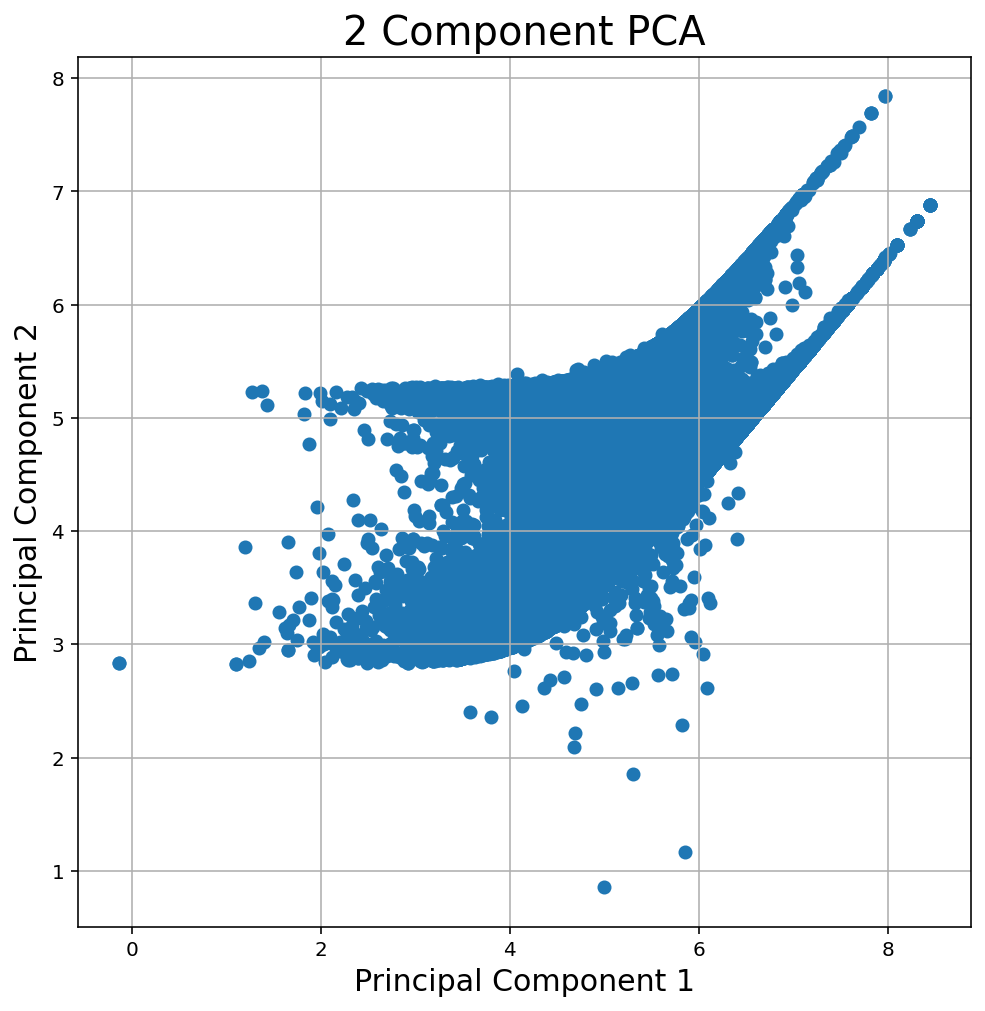

In [150]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 Component PCA', fontsize = 20)

ax.scatter(np.log10(finalDf['principal component 1']), np.log10(finalDf['principal component 2']))
ax.grid()

In [136]:
pca.explained_variance_ratio_

array([0.95475986, 0.03311284])

In [137]:
pca.explained_variance_ratio_.sum()

0.9878727059213441

Together, the first two principal components contain 98.78% of the information. The first principal component contains 95.47% of the variance and the second principal component contains 3.31% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

#### What are the limitations of PCA?
- PCA is not scale invariant. check: we need to scale our data first.
- The directions with largest variance are assumed to be of the most interest
- Only considers orthogonal transformations (rotations) of the original variables
- PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.
- If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.

## 2.3 Clustering!

Implement the K-means clustering algorithm (not ++: random initialization). We ask you to write the algorithm from scratch following what you learned in class. !! We also ask you to use MapReduce in your K-means algorithm.

In [417]:
import seaborn as sns

In [418]:
from matplotlib import pyplot as plt
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen 
%config InlineBackend.figure_format = 'retina'

In [419]:
import pandas as pd
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.preprocessing import StandardScaler
 
def kmeans2(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :]
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean')
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) 
    #300 number of iteration nìby default in Kmeans function of sklearn
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
        
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points 

In [420]:
data_cluster = pd.read_pickle('bank.pkl')

In [421]:
data_cluster['CustAccountBalanceLog'] = np.log10(data.CustAccountBalance)

C:\Users\Win10\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [422]:
data_cluster.loc[data_cluster['CustAccountBalanceLog'] == -np.inf, 'CustAccountBalanceLog'] = -1
age_balance_sample = data_cluster[['CustomerID', 'CustomerAge', 'CustAccountBalanceLog']].groupby('CustomerID').last()

In [453]:
age_balance_sample = age_balance_sample.sample(10000, replace=True)

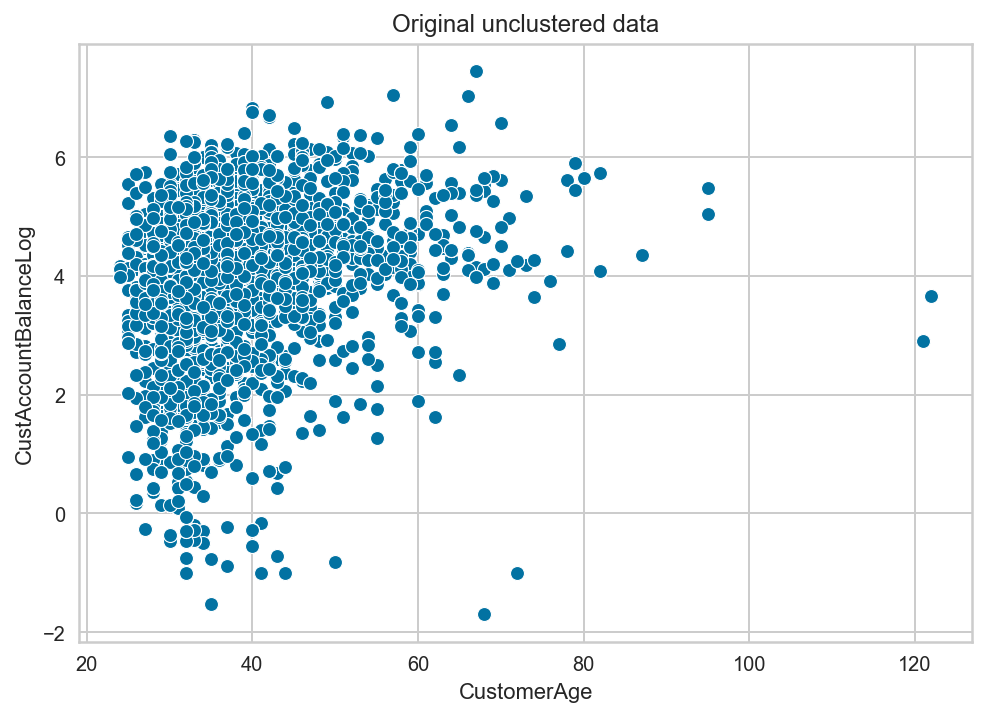

In [529]:
sns.scatterplot(x = age_balance_sample.CustomerAge, y = age_balance_sample.CustAccountBalanceLog).set( title = "Original unclustered data");

In [455]:
age_balance_sample

,CustomerAge,CustAccountBalanceLog
CustomerID,,
C4034664,35,3.503273
C3016733,39,4.450739
C4436981,27,5.018892
C7279171,37,4.989061
C3216540,54,2.833663
...,...,...
C3710915,31,3.740895
C1898830,37,4.161231
C7115251,38,4.710080


In [456]:
from sklearn.decomposition import PCA
  
#Transform the data
pca = PCA(2)
df = pca.fit_transform(age_balance_sample)
 

Now df is our transformed data to apply the kmeans on:

In [476]:
print(df)

[[ -2.61339852   0.52556246]
 [  1.40574311  -0.33710371]
 [-10.57955863  -1.15889453]
 ...
 [  0.41145102  -0.61753296]
 [ 15.3474462    2.56706387]
 [ -4.58327113  -0.91992902]]


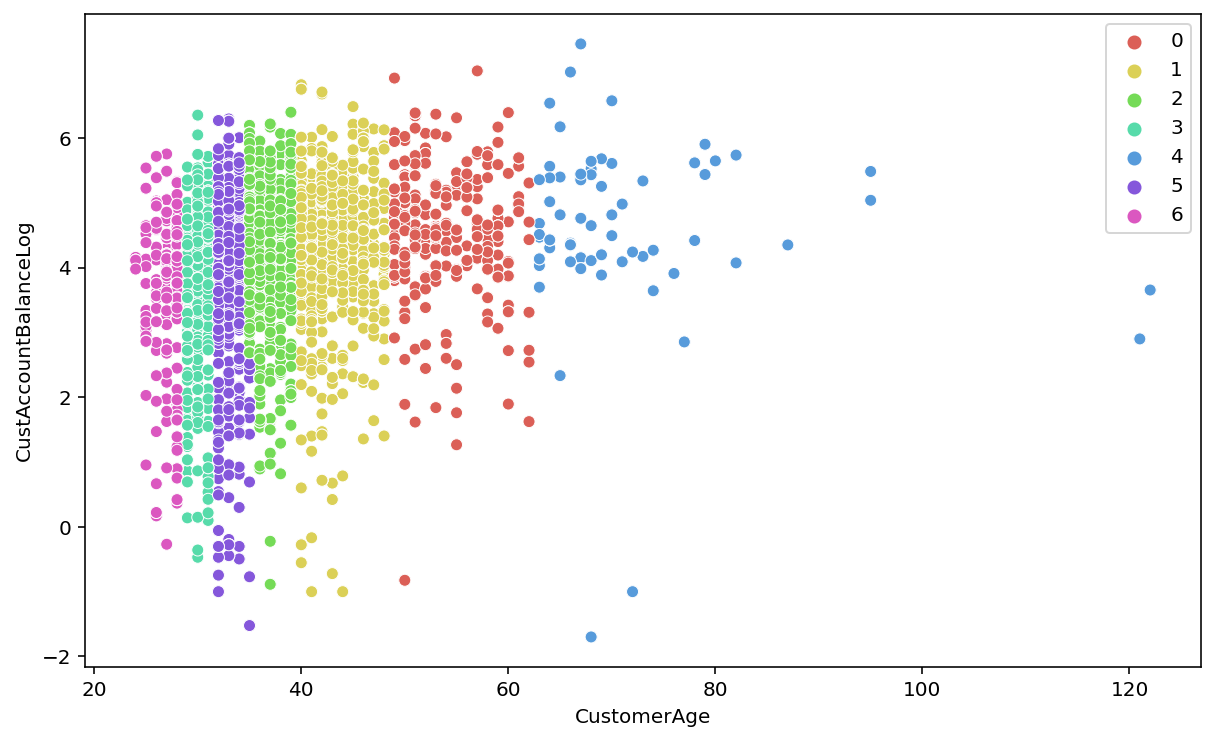

In [457]:
label2 = kmeans2(df,7,300)
#kmeans with 7 cluster 

#Visualize the results
 
sns.scatterplot(x = age_balance_sample.CustomerAge,
                 y = age_balance_sample.CustAccountBalanceLog,
                 palette = sns.color_palette("hls",7),
                  hue=label2);

In [458]:
len(label2)

10000

Text(0.5, 1.0, 'Clustered data - K_Means')

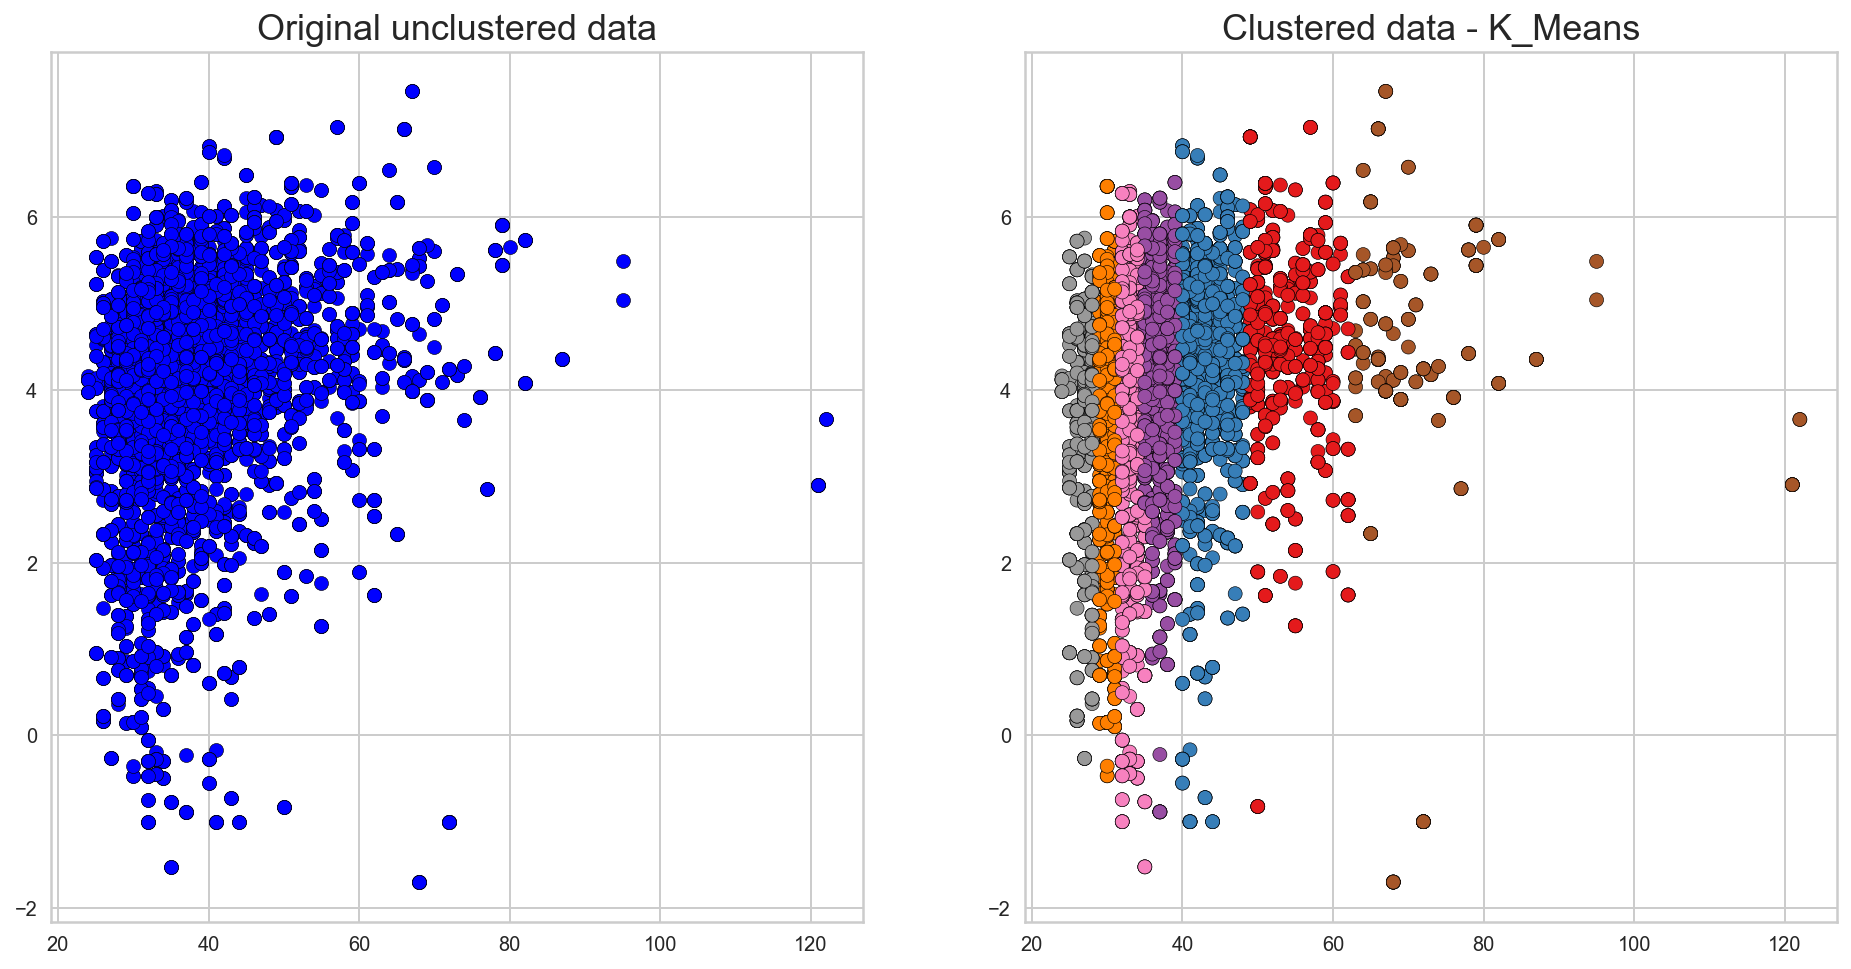

In [533]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(age_balance_sample['CustomerAge'], age_balance_sample['CustAccountBalanceLog'], c="blue", edgecolors = "black")
axes[1].scatter(age_balance_sample['CustomerAge'], age_balance_sample['CustAccountBalanceLog'], c= label2, cmap=plt.cm.Set1, edgecolors= "black")
axes[0].set_title('Original unclustered data', fontsize=18)
axes[1].set_title('Clustered data - K_Means', fontsize=18)

### Intercluster Distance

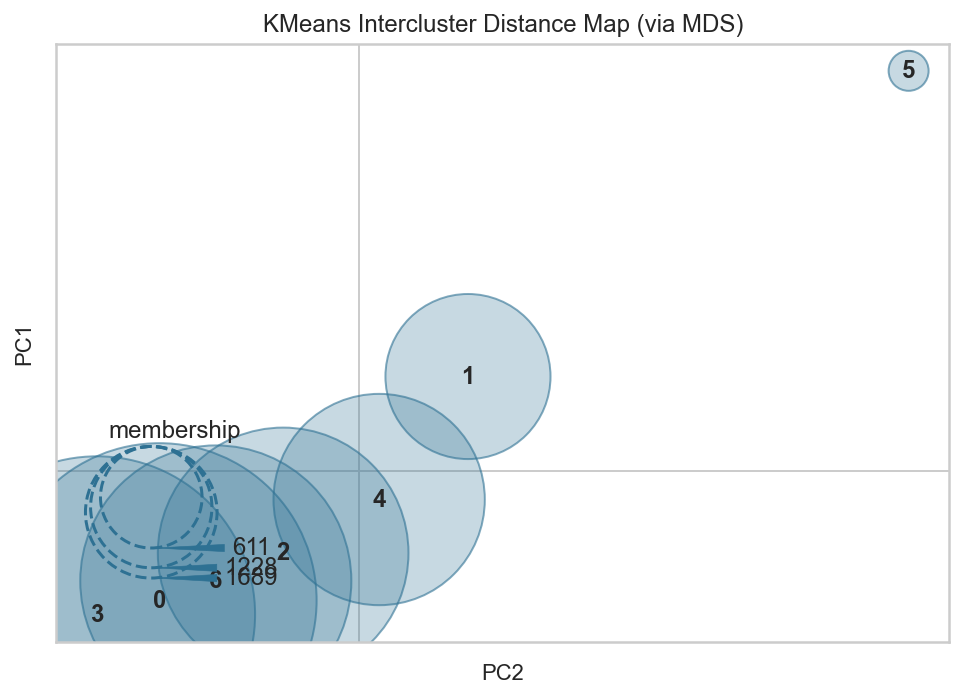

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [541]:
model = KMeans(7)
visualizer = InterclusterDistance(model)

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()   

## Find an optimal number of clusters

Use at least two different methods. If your algorithms provide diverse optimal K's, select one of them and explain why you chose it.

### Elbow Method

The basic idea behind partitioning methods, such as k-means clustering, is to define clusters such that the total intra-cluster variation [or total within-cluster sum of square (WSS)] is minimized. The total WSS measures the compactness of the clustering and we want it to be as small as possible.

The Elbow method looks at the total WSS as a function of the number of clusters: One should choose a number of clusters so that adding another cluster doesn’t improve much better the total WSS.

The optimal number of clusters can be defined as follow:
1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters.
2. For each k, calculate the total within-cluster sum of square (wss).
3. Plot the curve of wss according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clusters.

In [451]:
from tqdm import tqdm
from sklearn.cluster import KMeans

In [478]:
sd = {}
for k in tqdm(range(2, 100)):
    model = KMeans(n_clusters=k)
    model.fit(df)
    sd[k] = model.inertia_

100%|██████████████████████████████████████████████████████████████████████████████████| 98/98 [01:04<00:00,  1.52it/s]


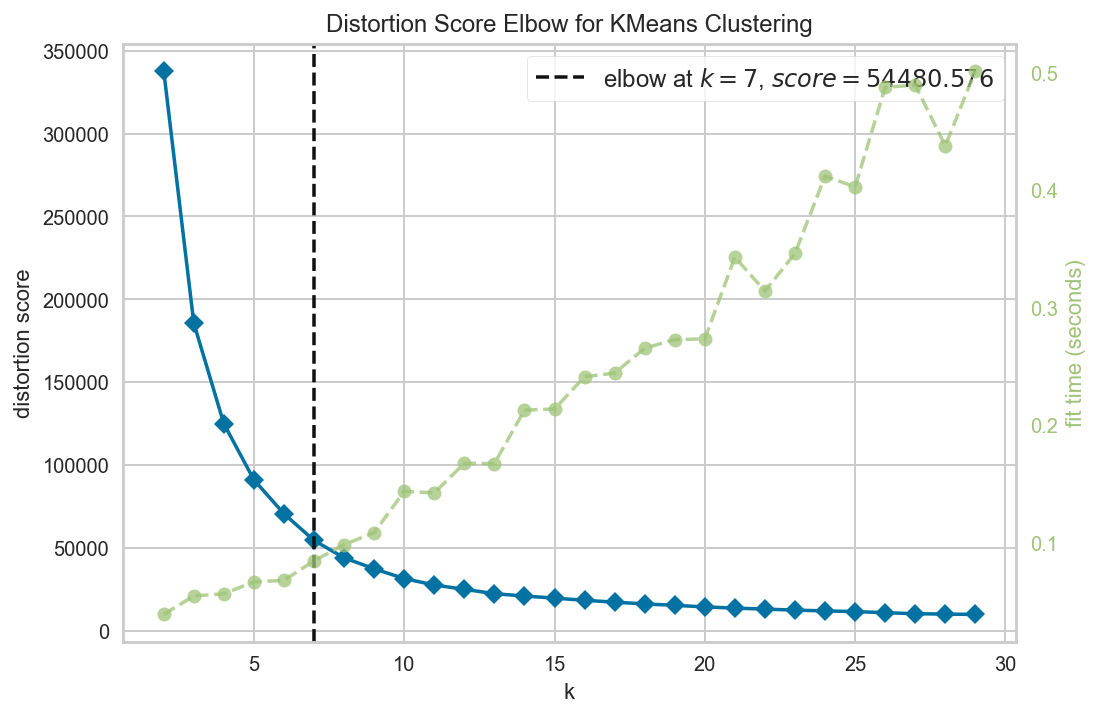

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [479]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,30), timings= True)
visualizer.fit(df)        # Fit data to visualizer
visualizer.show()        # Finalize and render figure

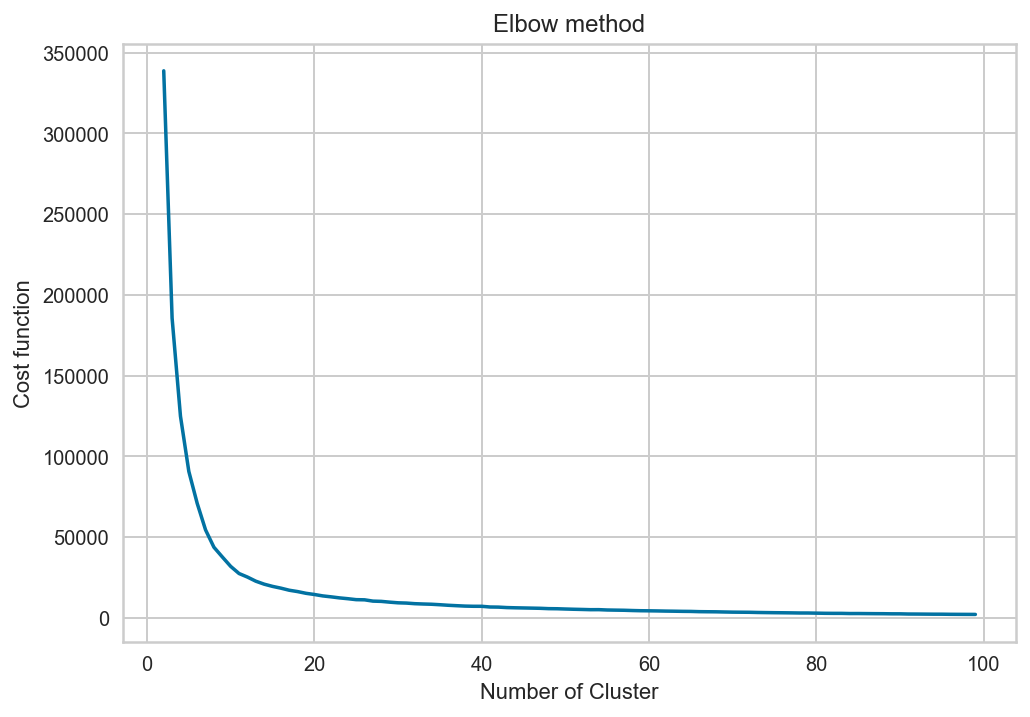

In [480]:
plt.figure()
plt.plot(list(sd.keys()), list(sd.values()))
plt.xlabel('Number of Cluster')
plt.ylabel('Cost function')
plt.title('Elbow method')
plt.show()

#### We can observe that the “elbow” is the number 7 which is optimal for this case

 #### Now we can run a K-Means using as n_clusters the number 7.

In [465]:
age_balance_sample2 = age_balance_sample.copy()

In [474]:
model2 = KMeans(n_clusters=7)
age_balance_sample2['cluster'] = model2.fit_predict(df)
age_balance_sample2['k_means']= model2.predict(df)

In [471]:
age_balance_sample2.head()

,CustomerAge,CustAccountBalanceLog,cluster,k_means
CustomerID,,,,
C4034664,35,3.503273,2,2
C3016733,39,4.450739,0,0
C4436981,27,5.018892,6,6
C7279171,37,4.989061,0,0
C3216540,54,2.833663,1,1


Text(0.5, 1.0, 'K_Means')

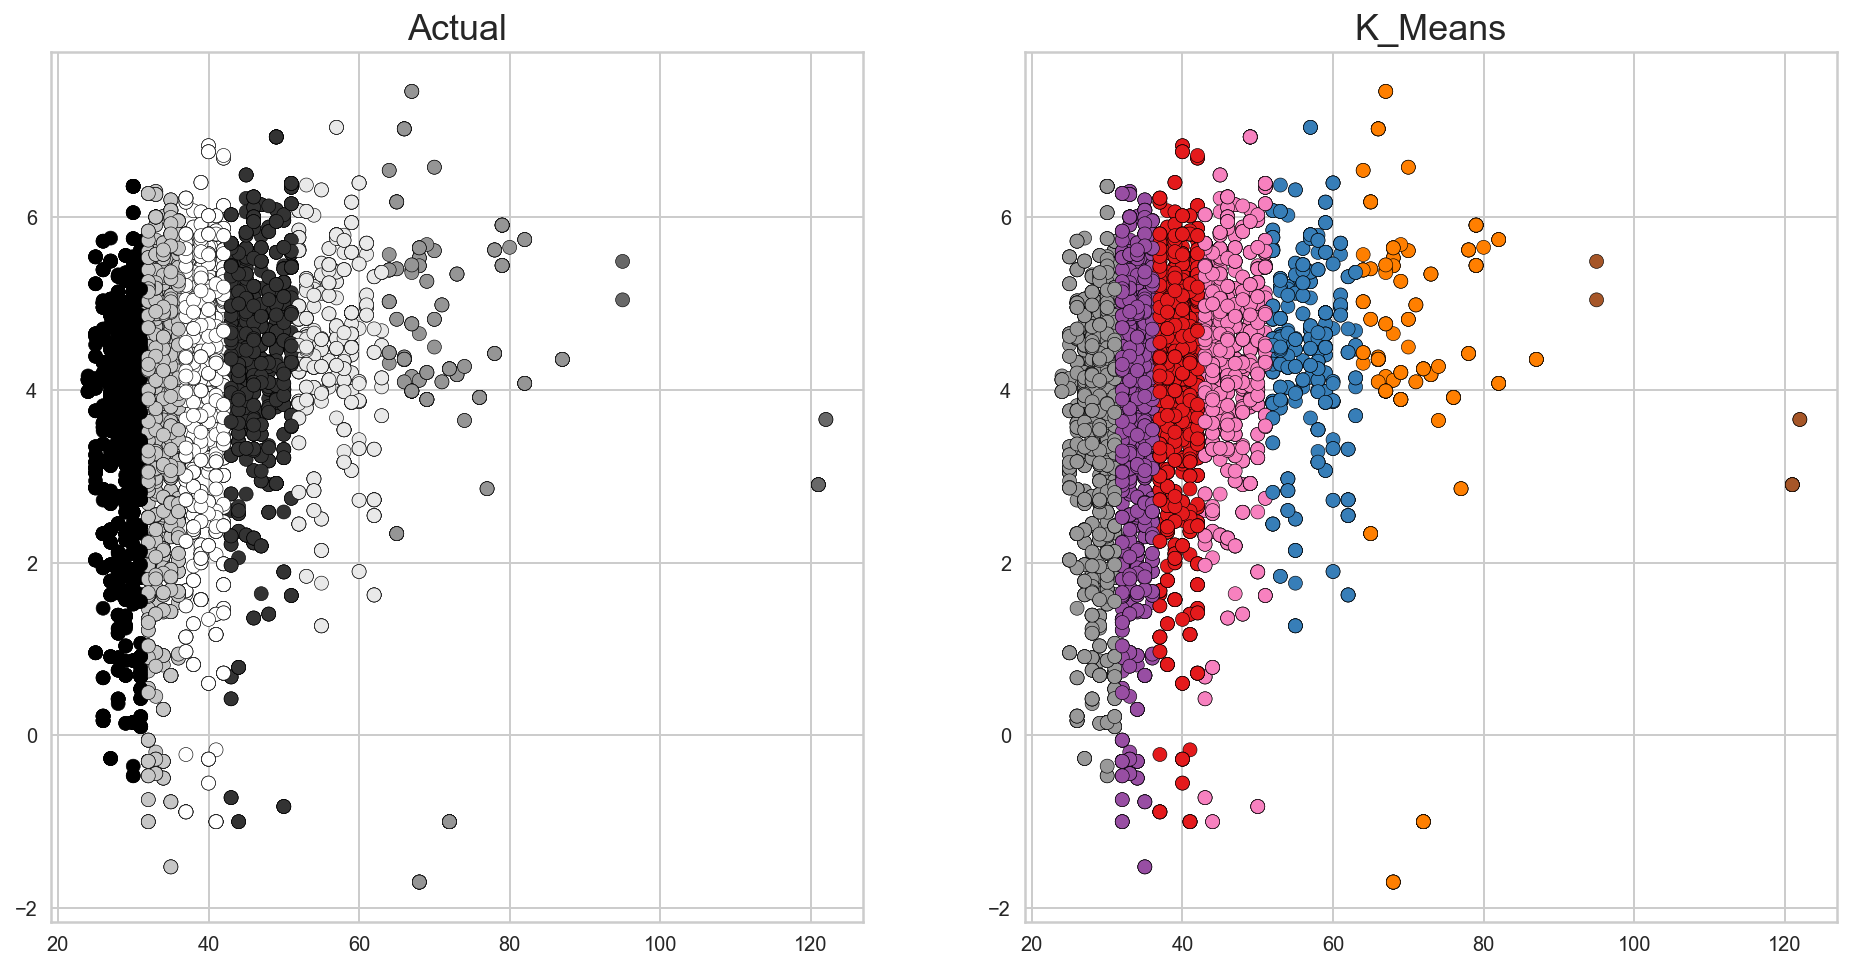

In [472]:
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].scatter(age_balance_sample2['CustomerAge'], age_balance_sample2['CustAccountBalanceLog'], c=age_balance_sample2['cluster'], edgecolors = "black")
axes[1].scatter(age_balance_sample2['CustomerAge'], age_balance_sample2['CustAccountBalanceLog'], c=age_balance_sample2['k_means'], cmap=plt.cm.Set1, edgecolors= "black")
axes[0].set_title('Actual', fontsize=18)
axes[1].set_title('K_Means', fontsize=18)

Given the number of clusters, it is easy to see that the K-means does a really good job defining the clusters of the dataset.


### Silhouette
The Silhouette Coefficient for a point i is defined as follows:

![siluette](siluette.png)

where b(i) is the smallest average distance of point i to all points in any other cluster and a(i) is the average distance of i from all other points in its cluster. The Silhouette Coefficient for the dataset is the average of the Silhouette Coefficient of individual points.

The Silhouette Coefficient tells us if individual points are correctly assigned to their clusters. We can use the following thumb rules while using Silhouette Coefficient:

1. S(i) close to 0 means that the point is between two clusters
2. If it is closer to -1, then we would be better off assigning it to the other clusters
3. If S(i) is close to 1, then the point belongs to the ‘correct’ cluster

In [482]:
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance

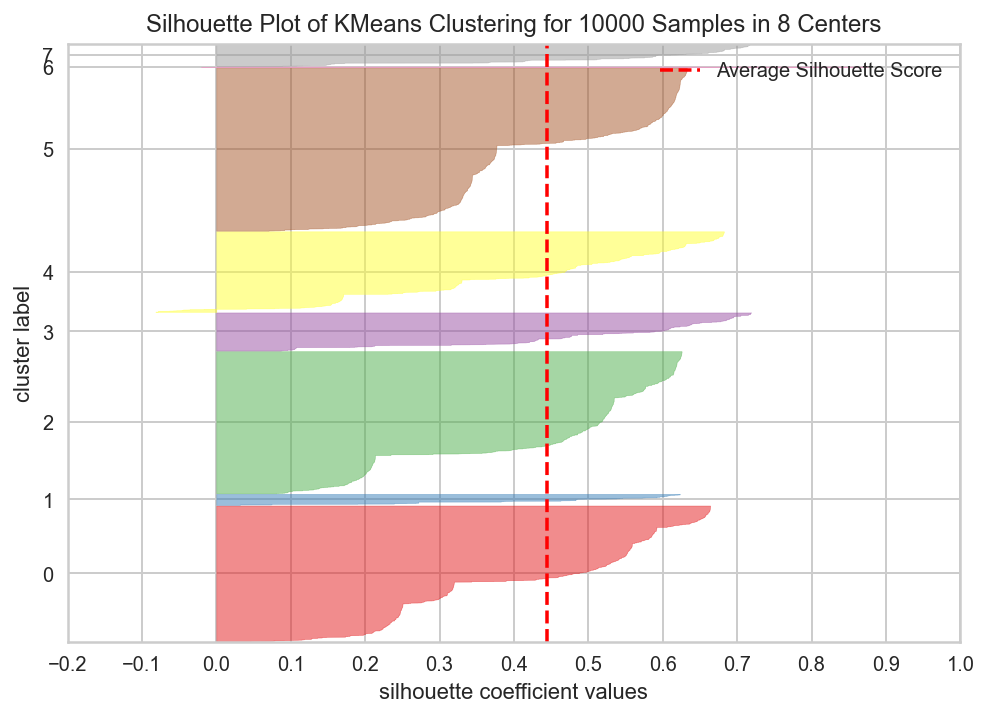

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 10000 Samples in 8 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [483]:
model = KMeans()
visualizer = SilhouetteVisualizer(model, k=(2,30), metric='silhouette')

visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()   

#### We can observe that the “Silhouette” is the number 7 which is optimal for this case

### Calinski-Harabasz Index
The index is calculated by dividing the variance of the sums of squares of the distances of individual objects to their cluster center by the sum of squares of the distance between the cluster centers. Higher the Calinski-Harabasz Index value, better the clustering model. The formula for Calinski-Harabasz Index is defined as:


![calinski](caliski.png)


where k is the number of clusters, n is the number of records in data, BCSM (between cluster scatter matrix) calculates separation between clusters and WCSM (within cluster scatter matrix) calculates compactness within clusters.




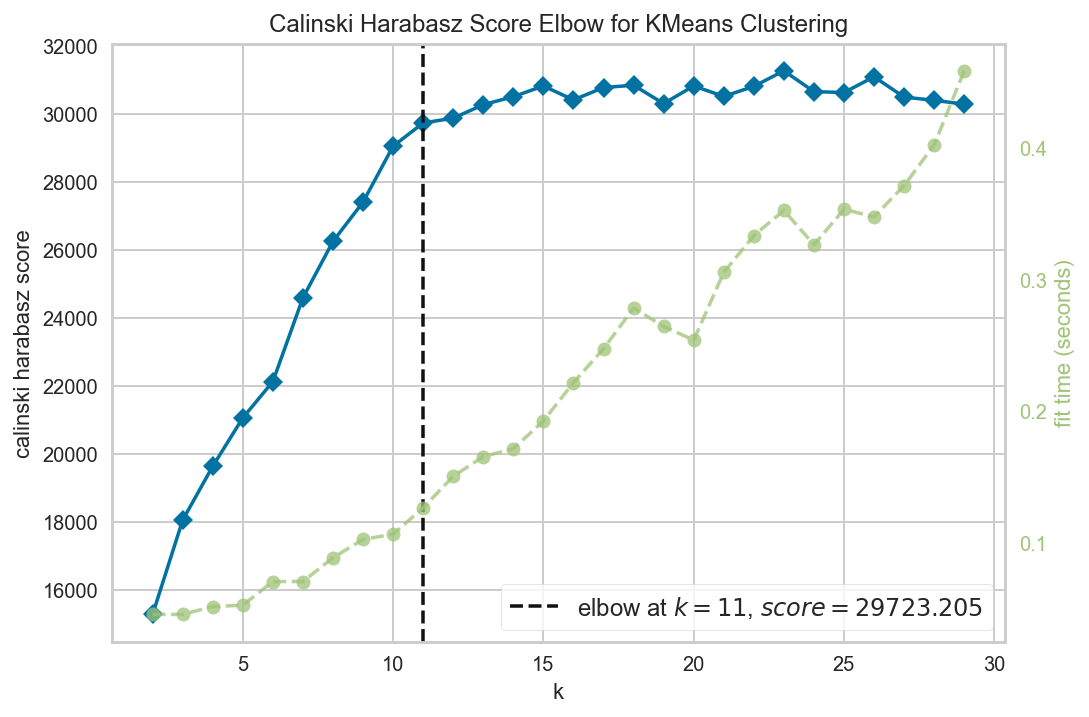

<AxesSubplot:title={'center':'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [515]:
visualizer = KElbowVisualizer(model, k=(2,30),metric='calinski_harabasz', timings= True)
visualizer.fit(df)        # Fit the data to the visualizer
visualizer.show()  

### Davies-Bouldin Index
The Davies-Bouldin (DB) Index is defined as:

![davies](davies.png)

where n is the count of clusters and σi is the average distance of all points in cluster i from the cluster centre ci.

Like silhouette coefficient and Calinski-Harabasz index, the DB index captures both the separation and compactness of the clusters.This is due to the fact that the measure’s ‘max’ statement repeatedly selects the values where the average point is farthest away from its center, and where the centers are closest together. But unlike silhouette coefficient and Calinski-Harabasz index, as DB index falls, the clustering improves.


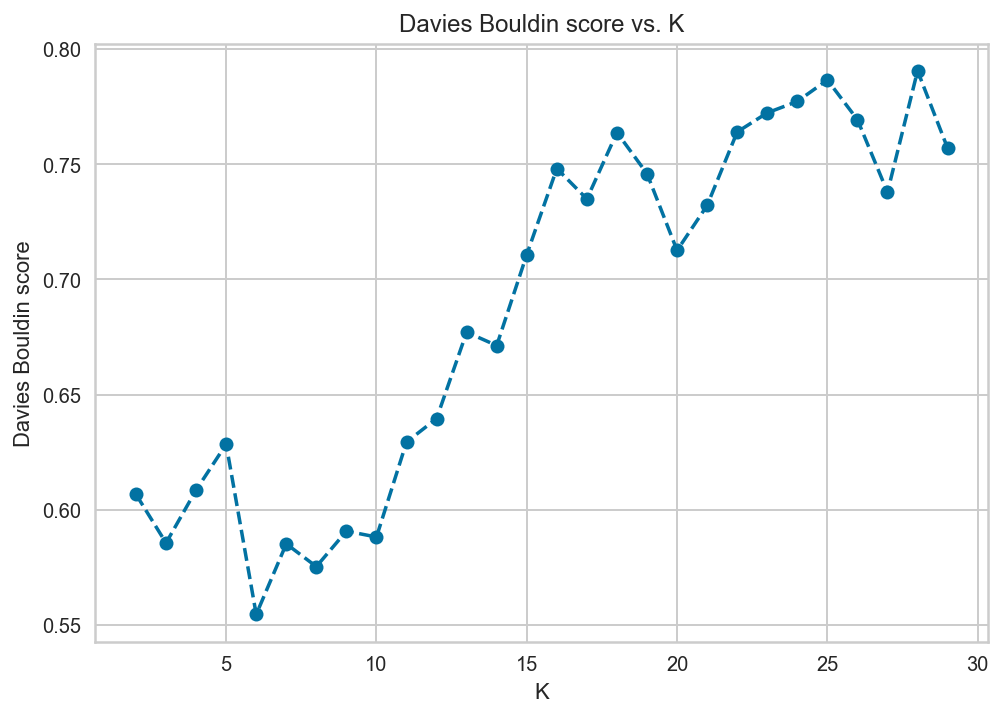

In [517]:
# Davies Bouldin score for K means
from sklearn.metrics import davies_bouldin_score
def get_kmeans_score(data, center):
    kmeans = KMeans(n_clusters=center)
    model = kmeans.fit_predict(df)
    score = davies_bouldin_score(df, model)
    return score
scores = []
centers = list(range(2,30))
for center in centers:
    scores.append(get_kmeans_score(df, center))
    
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('Davies Bouldin score');
plt.title('Davies Bouldin score vs. K');

The Davies Bouldin score is minimized with 7 clusters and can be considered for the k means algorithm

### Dendrogram
This technique is specific to the agglomerative hierarchical method of clustering. The agglomerative hierarchical method of clustering starts by considering each point as a separate cluster and starts joining points to clusters in a hierarchical fashion based on their distances. In a separate blog, we will focus on the details of this method. To get the optimal number of clusters for hierarchical clustering, we make use a dendrogram which is tree-like chart that shows the sequences of merges or splits of clusters.

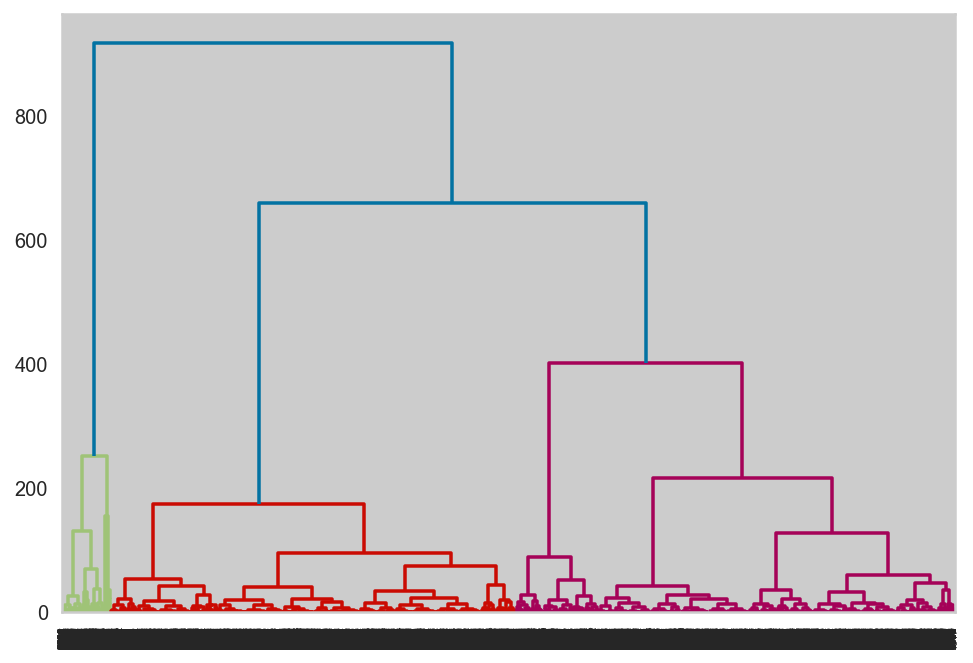

In [519]:
from scipy.cluster.hierarchy import dendrogram, linkage
dend = dendrogram(linkage(df, method = 'ward'))

The dendrogram method is useless when applied on many units (in our case 10000)

**By applying the various methods the optimal number of clusters is because is the most common result of all analyzed methods**

### Then, use the already implemented version of K-means++ (from the scikit-learn library). Explain the differences (if there are any) in the results.
K-means++ is a smart centroid initialization method for the K-mean algorithm. The goal is to spread out the initial centroid by assigning the first centroid randomly then selecting the rest of the centroids based on the maximum squared distance. The idea is to push the centroids as far as possible from one another.

In [520]:
from sklearn.cluster import kmeans_plusplus

In [521]:
centers, indices= kmeans_plusplus(df, n_clusters=7, random_state=0)

In [522]:
centers

array([[-6.59787029, -0.25086956],
       [27.43645313, -1.51404827],
       [ 4.42208677, -1.07806375],
       [ 8.33879011,  2.90227752],
       [-2.59868323, -0.17013686],
       [83.35467241,  2.94450855],
       [12.41025739, -0.43420495]])

In [523]:
indices

array([2732, 8501, 6213, 2683, 4922, 4129, 3572])

[[-3.72158266e+00 -1.88873433e-03]
 [ 1.76760341e+01 -8.61498479e-02]
 [ 8.21398978e+00 -1.31366457e-01]
 [ 1.48485005e+00 -1.05834119e-01]
 [ 7.83689796e+01  2.21522766e+00]
 [ 3.27019030e+01  4.32650327e-01]
 [-8.32619409e+00  1.35511976e-01]]


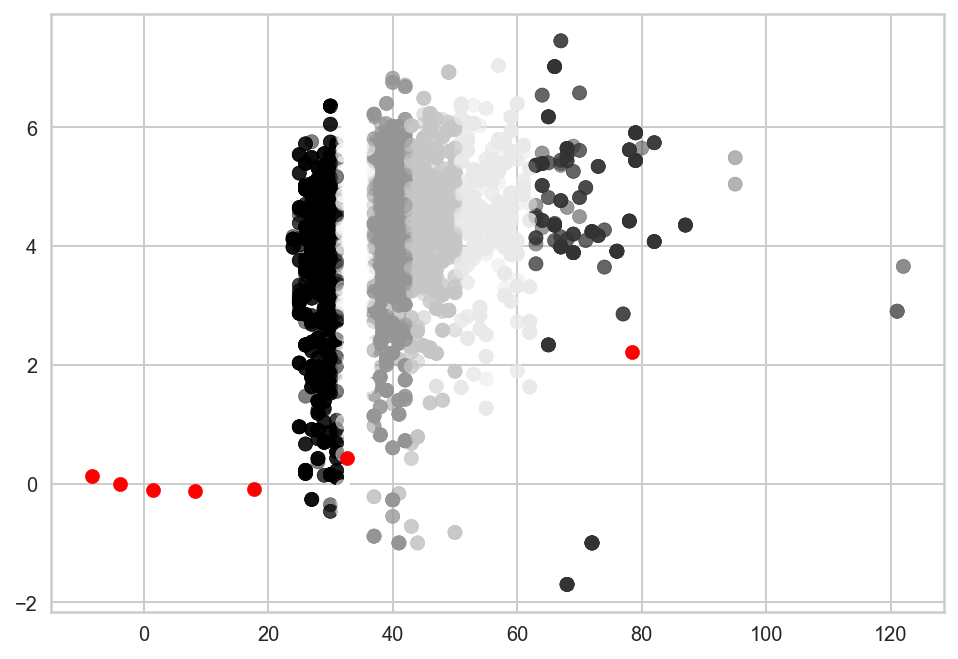

In [524]:
kmeans_plus = KMeans(n_clusters=7, init='k-means++').fit(df)

centroids = kmeans_plus.cluster_centers_
print(centroids)

plt.scatter(age_balance_sample['CustomerAge'], age_balance_sample['CustAccountBalanceLog'], c= kmeans_plus.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()

### Kmeans with sklearn

In [534]:
model3 = KMeans(n_clusters=7)
age_balance_sample3 = age_balance_sample.copy()
age_balance_sample3['cluster'] = model3.fit_predict(df)

In [535]:
age_balance_sample3

,CustomerAge,CustAccountBalanceLog,cluster
CustomerID,,,
C4034664,35,3.503273,1
C3016733,39,4.450739,0
C4436981,27,5.018892,5
C7279171,37,4.989061,0
C3216540,54,2.833663,2
...,...,...,...
C3710915,31,3.740895,5
C1898830,37,4.161231,0
C7115251,38,4.710080,0


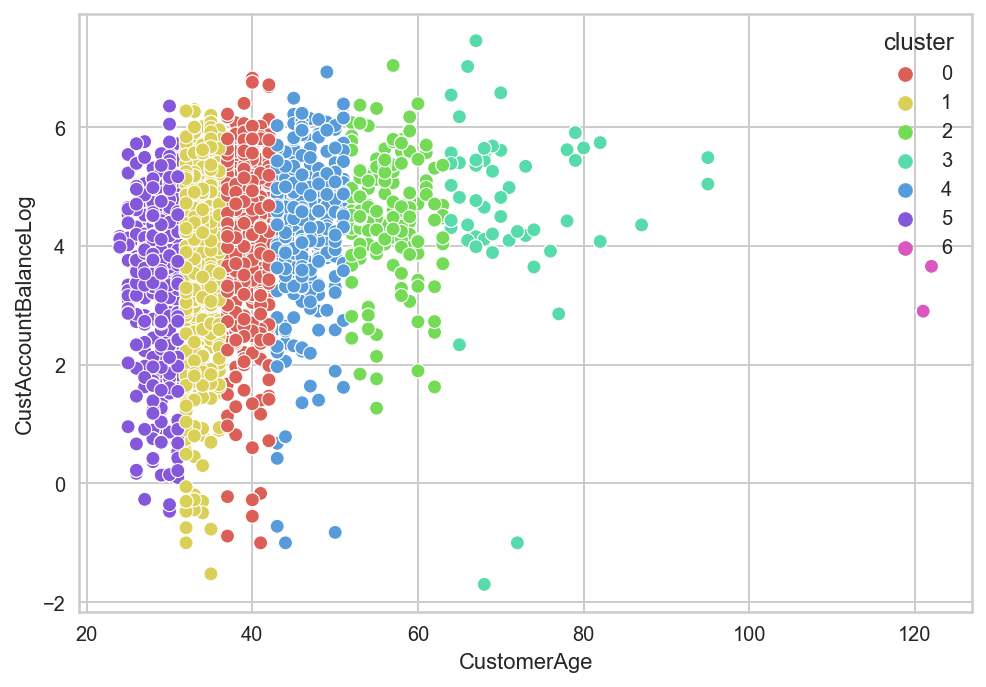

In [536]:
sns.scatterplot(x = age_balance_sample3.CustomerAge,
                 y = age_balance_sample3.CustAccountBalanceLog,
                 palette = sns.color_palette('hls',7),
                  hue=age_balance_sample3.cluster, legend="auto");

When we take a centroid, the k-means++ has a greater probability of taking a centroid far from the initial centroid, in our case the points are very close together so it takes the centroids outside.
In our dataset, kmeans gives us a better solution because kmeans++ is not suitable.